In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
diabetes = datasets.load_diabetes()
# X_diabetes = diabetes.data

'''
numpy's newaxis will return a column vector
the last arg specifies the column index
this is only a simple linear regression
'''
X_diabetes = pd.DataFrame(diabetes.data[:, np.newaxis, 2])
y_diabetes = pd.DataFrame(diabetes.target)

# Y_diabetes.head()
print("X_diabetes shape: ", X_diabetes.shape, ", Y_diabetes shape: ", y_diabetes.shape)

('X_diabetes shape: ', (442, 1), ', Y_diabetes shape: ', (442, 1))


In [3]:
X_train = X_diabetes[:-20]
X_test = X_diabetes[-20:]
y_train = y_diabetes[:-20]
y_test = y_diabetes[-20:]

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Train size: ", X_train.shape, ", Test size: ", X_test.shape)

('Train size: ', (422, 1), ', Test size: ', (20, 1))


In [4]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train, y_train)
predictions = linearRegression.predict(X_test)

print('Regression coefficients: ', linearRegression.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictions))
print('R2 measure for explained variance: %.2f' % r2_score(y_test, predictions))

('Regression coefficients: ', array([[ 938.23786125]]))
Mean squared error: 2548.07
R2 measure for explained variance: 0.47


In [5]:
result = pd.concat([X_test, y_test, pd.DataFrame(predictions)], axis=1)
result.columns = ['X','y','pred']
result.head()

,X,y,pred
0,0.077863,233.0,225.973240
1,-0.039618,91.0,115.747634
2,0.011039,111.0,163.276106
3,-0.040696,152.0,114.736390
4,-0.034229,120.0,120.803854


In [6]:
'''
Ridge regression penalizes the coefficient based on a control parameter alpha.
Larger the value of alpha, greater the shrinkage of regression coefficients.

Cross-validated Ridge regression:
Similar to GridSearchCV, but defaults to Generalized cross-validations -- an efficient form of LeaveOneOutCV
'''
ridgeCV = linear_model.RidgeCV(alphas = np.logspace(-10, -2, 100))
ridgeCV.fit(X_train, y_train)
print('Optimal alpha among the given options: %.2f'% ridgeCV.alpha_)

Optimal alpha among the given options: 0.00


In [7]:
ridgeRegression = linear_model.Ridge(alpha = ridgeCV.alpha_)
ridgeRegression.fit(X_train, y_train)
predictionsRidge = ridgeRegression.predict(X_test)
print('Ridge coefficients: ', ridgeRegression.coef_[0][0])
print('Mean squared error: %.2f' % mean_squared_error(y_test, predictionsRidge))
print('R2 measure for explained variability: %.2f' % r2_score(y_test, predictionsRidge))

('Ridge coefficients: ', 934.38157163264179)
Mean squared error: 2552.49
R2 measure for explained variability: 0.47


In [8]:
result = pd.concat([X_test, y_test, pd.DataFrame(predictions), pd.DataFrame(predictionsRidge)], axis=1)
result.columns = ['X', 'y', 'pred_linear', 'pred_ridge']

result.head()

,X,y,pred_linear,pred_ridge
0,0.077863,233.0,225.973240,225.674800
1,-0.039618,91.0,115.747634,115.902236
2,0.011039,111.0,163.276106,163.235360
3,-0.040696,152.0,114.736390,114.895149
4,-0.034229,120.0,120.803854,120.937675


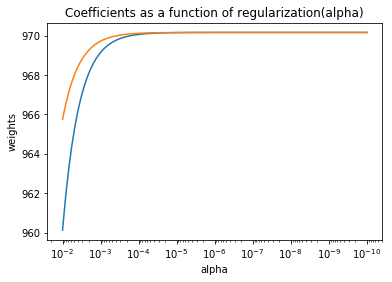

In [9]:
'''
Visualize the weight-alpha relationship
'''
coeffs = []; coeffsLasso = []
alphas = np.logspace(-10, -2, 100)

for alpha in alphas:
    ridgeFit = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridgeFit.fit(X_train, y_train)
    coeffs.append(ridgeFit.coef_[0][0])
    
    lassoFit = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    lassoFit.fit(X_train, y_train)
    coeffsLasso.append(lassoFit.coef_)

ax = plt.gca()

ax.plot(alphas, coeffs)
ax.plot(alphas, coeffsLasso)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ax.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients as a function of regularization(alpha)')
plt.axis('tight')
plt.show()

In [10]:
lassoCV = linear_model.LassoCV(alphas=alphas)
lassoCV.fit(X_train, y_train)
print("Optimal alpha for Lasso Regression: %.2f" % lassoCV.alpha_)

lassoRegression = linear_model.Lasso(alpha=lassoCV.alpha_)
lassoRegression.fit(X_train, y_train)
predictionsLasso = lassoRegression.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, predictionsLasso))
print("R2 measure for measure of explained variability: %.2f" % r2_score(y_test, predictionsLasso))

Optimal alpha for Lasso Regression: 0.00
Mean squared error: 2548.07
R2 measure for measure of explained variability: 0.47


/home/saileshg/sailspace/dev/pyprojects/mlenv/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
result = pd.concat([X_test, y_test, pd.DataFrame(predictions), pd.DataFrame(predictionsRidge), pd.DataFrame(predictionsLasso)], axis=1)
result.columns = ['X', 'y', 'pred_linear', 'pred_ridge', 'pred_lasso']

result.head()

,X,y,pred_linear,pred_ridge,pred_lasso
0,0.077863,233.0,225.973240,225.674800,225.973240
1,-0.039618,91.0,115.747634,115.902236,115.747634
2,0.011039,111.0,163.276106,163.235360,163.276106
3,-0.040696,152.0,114.736390,114.895149,114.736390
4,-0.034229,120.0,120.803854,120.937675,120.803854


In [12]:
'''
Elastic Net Regression uses a combination of l1 & l2 norms and there's a l1-ratio param
which decides the influence of l1 or l2 on the regularization. In this way, the combination
of these two norms are used suitably to penalize the coefficients and thereby reach the solution.
'''
elasticNetCV = linear_model.ElasticNetCV(alphas=alphas, l1_ratio=0.6)
elasticNetCV.fit(X_train, y_train)
print("Optimal alpha for Elastic Net: %.2f" % elasticNetCV.alpha_)

elasticNetRegression = linear_model.ElasticNet(alpha=elasticNetCV.alpha_, l1_ratio=0.6)
elasticNetRegression.fit(X_train, y_train)
predictionsENet = elasticNetRegression.predict(X_test)

Optimal alpha for Elastic Net: 0.00


In [13]:
result = pd.concat([X_test, y_test, pd.DataFrame(predictions), pd.DataFrame(predictionsRidge), pd.DataFrame(predictionsLasso), pd.DataFrame(predictionsENet)], axis=1)
result.columns = ['X','y','pred_linear', 'pred_ridge', 'pred_lasso', 'pred_enet']

result.head()

,X,y,pred_linear,pred_ridge,pred_lasso,pred_enet
0,0.077863,233.0,225.973240,225.674800,225.973240,225.943577
1,-0.039618,91.0,115.747634,115.902236,115.747634,115.763000
2,0.011039,111.0,163.276106,163.235360,163.276106,163.272056
3,-0.040696,152.0,114.736390,114.895149,114.736390,114.752169
4,-0.034229,120.0,120.803854,120.937675,120.803854,120.817155


In [14]:
'''
Lasso combined with LARS or Least Angle Regression.
LARS is suitable for estimation when features > samples (n > m)
LARS - Least Angle Regression: similar to forward stepwise regression, 
identifies the most correlated attribute with the response iteratively.
When there are more than one equally correlated attributes with the response,
it takes up an "equiangular" direction of these attributes*
'''
lassoLars = linear_model.LassoLars(alpha=lassoCV.alpha_)
lassoLars.fit(X_train, y_train)
predictionsLassoLars = lassoLars.predict(X_test)

In [16]:
result = pd.concat([X_test, y_test, pd.DataFrame(predictions), pd.DataFrame(predictionsRidge), pd.DataFrame(predictionsLasso), pd.DataFrame(predictionsENet), pd.DataFrame(predictionsLassoLars)], axis = 1)
result.columns = ['X', 'y', 'pred_linear', 'pred_ridge', 'pred_lasso', 'pred_enet', 'pred_lassolars']

result.head()

,X,y,pred_linear,pred_ridge,pred_lasso,pred_enet,pred_lassolars
0,0.077863,233.0,225.973240,225.674800,225.973240,225.943577,225.973240
1,-0.039618,91.0,115.747634,115.902236,115.747634,115.763000,115.747634
2,0.011039,111.0,163.276106,163.235360,163.276106,163.272056,163.276106
3,-0.040696,152.0,114.736390,114.895149,114.736390,114.752169,114.736390
4,-0.034229,120.0,120.803854,120.937675,120.803854,120.817155,120.803854


In [17]:
'''
Bayesian Regression
'''

bayesianRidge = linear_model.BayesianRidge()
bayesianRidge.fit(X_train, y_train)
predictionsBayes = bayesianRidge.predict(X_test)

resultDict = {}

result = pd.concat([X_test, y_test, pd.DataFrame(predictions), pd.DataFrame(predictionsRidge), pd.DataFrame(predictionsLasso), pd.DataFrame(predictionsENet), pd.DataFrame(predictionsLassoLars), pd.DataFrame(predictionsBayes)], axis = 1)
result.columns = ['X', 'y', 'pred_linear', 'pred_ridge', 'pred_lasso', 'pred_enet', 'pred_lassolars', 'pred_bayesian']

resultDict['diabetes'] = result

result.head()

/home/saileshg/sailspace/dev/pyprojects/mlenv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,X,y,pred_linear,pred_ridge,pred_lasso,pred_enet,pred_lassolars,pred_bayesian
0,0.077863,233.0,225.973240,225.674800,225.973240,225.943577,225.973240,225.631071
1,-0.039618,91.0,115.747634,115.902236,115.747634,115.763000,115.747634,115.924889
2,0.011039,111.0,163.276106,163.235360,163.276106,163.272056,163.276106,163.229390
3,-0.040696,152.0,114.736390,114.895149,114.736390,114.752169,114.736390,114.918411
4,-0.034229,120.0,120.803854,120.937675,120.803854,120.817155,120.803854,120.957283
